Detect Human Faces
================

We use OpenCV `cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')` to detect human faces.<br>
See [utils.detect_human_face](utils.py) for implementation.

In [2]:
import cv2
from tqdm import tqdm

import utils

In [3]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')
tqdm.pandas()

/home/baz/workspace/venv_pytorch/lib/python3.8/site-packages/tqdm/std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [4]:
df_human = utils.load_dataset('../data/lfw')
df_pokemon = utils.load_dataset('../data/Pokemon')
df_pokemon = df_pokemon[df_pokemon.apply(lambda x: not x.filename.endswith('.svg'), axis=1)]

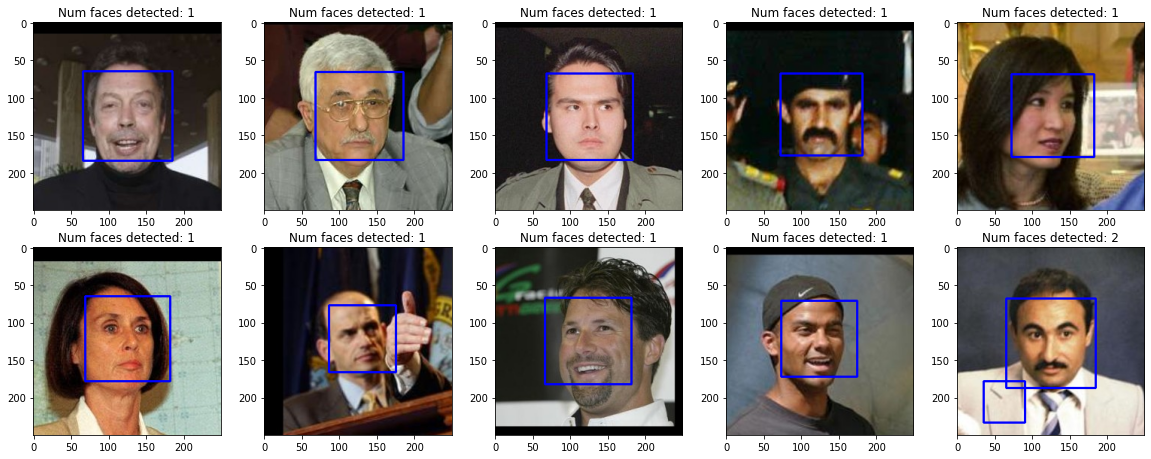

In [5]:
utils.detect_human_faces(df_human["filename"][:10].values)

In [6]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [7]:
df_human_sample = df_human[:100]
df_pokemon_sample = df_pokemon[:100]

df_human_sample.loc[df_human_sample.index.tolist(), 'face_detected'] = df_human_sample.progress_apply(lambda x: face_detector(x.filename), axis=1)
df_pokemon_sample.loc[df_pokemon_sample.index.tolist(), 'face_detected'] = df_pokemon_sample.progress_apply(lambda x: face_detector(x.filename), axis=1)

100%|██████████| 100/100 [00:02<00:00, 47.06it/s]
/home/baz/workspace/venv_pytorch/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/baz/workspace/venv_pytorch/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
100%|██████████| 100/100 [00:05<00:00, 17.27it/s]


In [8]:
print('Faces detected in Human sample:')
df_human_sample.groupby("face_detected").size().reset_index(name="Counts")

Faces detected in Human sample:


,face_detected,Counts
0,False,1
1,True,99


In [9]:
print('Faces detected in Pokemon sample:')
df_pokemon_sample.groupby("face_detected").size().reset_index(name="Counts")

Faces detected in Pokemon sample:


,face_detected,Counts
0,False,98
1,True,2


In [11]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_true = np.concatenate((np.ones((100), dtype=bool), np.zeros((100), dtype=bool)), axis=0)
y_pred = np.concatenate((df_human_sample["face_detected"], df_pokemon_sample["face_detected"]), axis=0)

In [13]:
cm = confusion_matrix(y_true, y_pred, labels=[1, 0])

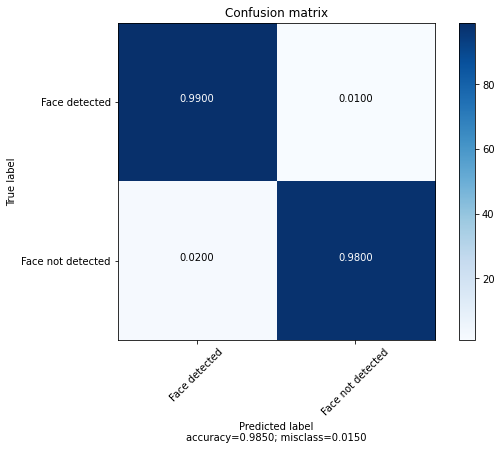

In [14]:
utils.plot_confusion_matrix(cm, ['Face detected', 'Face not detected'])

### Explore human faces not detected in human sample

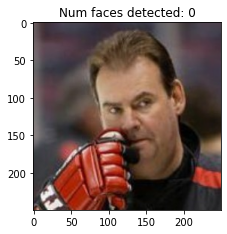

In [9]:
df_human_sample_no_faces = df_human_sample[df_human_sample["face_detected"] == False]
utils.detect_human_faces(df_human_sample_no_faces["filename"].values)

### Explore Pokémon images detected as human faces

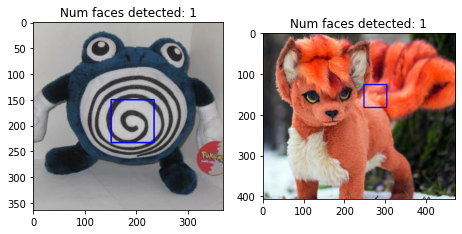

In [10]:
df_pokemon_sample_faces = df_pokemon_sample[df_pokemon_sample["face_detected"] == True]
utils.detect_human_faces(df_pokemon_sample_faces["filename"].values)

## Interpretation

We detected 99% of faces in the Human sample and only 2% in the Pokémon sample.<br>
Ideal result would be 100% for humans and 0% for pokémon, but this result is pretty good.